FremontBridge 데이터 분석 실습 과제
과제 1: 데이터 선택 및 조건 필터링
1. iloc 사용
데이터셋의 첫 15개의 행에서 west와 east 열만 선택하여 출력하세요.

2. loc 사용
west 열과 east 열의 값이 모두 50 이상인 데이터를 선택하고, 해당 데이터의 west와 east 열 각각의 평균을 계산하세요.

3. 조건에 따른 데이터 필터링
west 열의 값이 400 이상이고 east 열의 값이 0.6 이상인 데이터를 선택하여 출력하세요.


과제 2: 누락 데이터 처리
1. 누락 데이터 생성
DIS라는 새로운 열을 추가하고, 무작위로 15%의 데이터를 NaN 값으로 설정하세요.

2. 누락 데이터 처리
(a) 누락 데이터를 포함하는 행을 삭제한 새로운 데이터를 생성하고, 이를 확인하세요.
(b) 누락 데이터를 DIS 열의 중앙값으로 대체한 새로운 데이터를 생성하고, 이를 확인하세요.


과제 3: 기상 데이터와 자전거 사용자 수 관계 분석

배경
기상 데이터(Temperature, Rainfall, 등)가 주어졌다고 가정하고, 이를 Fremont Bridge 데이터와 결합합니다.

실습 문제
1) 임의의 기상 데이터를 생성하여 Temperature와 Rainfall 열을 추가하세요.
Temperature는 40~80°F 사이의 임의의 정수로 구성됩니다.
Rainfall은 0~5mm 사이의 임의의 실수로 구성됩니다.
2) Temperature와 Rainfall이 west와 east 통행량에 미치는 영향을 분석하기 위해, 조건에 따른 데이터를 필터링하세요.
Temperature가 60°F 이상일 때의 통행량 평균.
Rainfall이 2mm 이하일 때의 통행량 평균.
3) 위 데이터를 시각화하여 분석 결과를 그래프로 표현하세요.
Temperature와 west 통행량의 관계를 나타내는 산점도.
Rainfall과 east 통행량의 관계를 나타내는 선 그래프.


In [27]:
%pwd

'c:\\workspace_AIProg\\실습\\3장_판다스'

In [28]:
url = ('https://raw.githubusercontent.com/jakevdp/'
       'bicycle-data/main/FremontBridge.csv')
!curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 77 4585k   77 3571k    0     0  6074k      0 --:--:-- --:--:-- --:--:-- 6083k
100 4585k  100 4585k    0     0  6947k      0 --:--:-- --:--:-- --:--:-- 6958k


In [29]:
#1. iloc 사용
#데이터셋의 첫 15개의 행에서 west와 east 열만 선택하여 출력하세요.
import pandas as pd
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.columns = ['Total','West','East']
data.iloc[:15,[1,2]]

C:\Users\user\AppData\Local\Temp\ipykernel_8732\2721592794.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


,West,East
Date,,
2019-11-01 00:00:00,7.0,5.0
2019-11-01 01:00:00,0.0,7.0
2019-11-01 02:00:00,0.0,1.0
2019-11-01 03:00:00,6.0,0.0
2019-11-01 04:00:00,5.0,1.0
2019-11-01 05:00:00,9.0,11.0
2019-11-01 06:00:00,43.0,54.0
2019-11-01 07:00:00,120.0,179.0
2019-11-01 08:00:00,261.0,322.0


In [30]:
#2. loc 사용
#west 열과 east 열의 값이 모두 50 이상인 데이터를 선택하고, 해당 데이터의 west와 east 열 각각의 평균을 계산하세요.
meanData = data.loc[(data.West >= 50) & (data.East >= 50)]
print("West 50이상의 평균 : \n " ,meanData.loc[:,['West']].mean())
print("East 50이상의 평균 : \n " ,meanData.loc[:,['East']].mean())

West 50이상의 평균 : 
  West    120.055778
dtype: float64
East 50이상의 평균 : 
  East    150.292112
dtype: float64


In [31]:
#3. 조건에 따른 데이터 필터링
#west 열의 값이 400 이상이고 east 열의 값이 0.6 이상인 데이터를 선택하여 출력하세요.
print("west 열의 값이 400 이상이고 east 열의 값이 0.6 이상인 데이터 : \n", data.loc[(data.West >= 400) & (data.East >= 0.6)])

west 열의 값이 400 이상이고 east 열의 값이 0.6 이상인 데이터 : 
                      Total   West   East
Date                                    
2013-05-01 08:00:00  622.0  446.0  176.0
2013-05-02 08:00:00  603.0  433.0  170.0
2013-05-06 07:00:00  517.0  401.0  116.0
2013-05-06 08:00:00  650.0  448.0  202.0
2013-05-07 08:00:00  666.0  468.0  198.0
...                    ...    ...    ...
2019-06-11 08:00:00  892.0  423.0  469.0
2019-07-26 21:00:00  620.0  541.0   79.0
2019-05-17 08:00:00  693.0  413.0  280.0
2019-06-11 08:00:00  892.0  423.0  469.0
2019-07-26 21:00:00  620.0  541.0   79.0

[366 rows x 3 columns]


In [32]:
#1. 누락 데이터 생성
#DIS라는 새로운 열을 추가하고, 무작위로 15%의 데이터를 NaN 값으로 설정하세요.
import numpy as np
nums = int(len(data)*0.15)
rand_ints = np.random.randint(0, len(data), size=nums)
data['DIS'] = 0
data.iloc[rand_ints,3] = np.nan

In [33]:
#1) 임의의 기상 데이터를 생성하여 Temperature와 Rainfall 열을 추가하세요.
#Temperature는 40~80°F 사이의 임의의 정수로 구성됩니다.
#Rainfall은 0~5mm 사이의 임의의 실수로 구성됩니다.
data['Temperature'] = np.random.randint(40,80,len(data))
data['Rainfall'] = np.random.rand(len(data)) * 5
data

,Total,West,East,DIS,Temperature,Rainfall
Date,,,,,,
2019-11-01 00:00:00,12.0,7.0,5.0,0.0,41,3.249454
2019-11-01 01:00:00,7.0,0.0,7.0,0.0,54,0.061819
2019-11-01 02:00:00,1.0,0.0,1.0,0.0,73,4.503977
2019-11-01 03:00:00,6.0,6.0,0.0,NaN,58,2.742396
2019-11-01 04:00:00,6.0,5.0,1.0,0.0,54,3.218216
...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,52,1.517837
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,61,3.620149
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,55,0.468048


In [34]:
#2) Temperature와 Rainfall이 west와 east 통행량에 미치는 영향을 분석하기 위해, 조건에 따른 데이터를 필터링하세요.
#Temperature가 60°F 이상일 때의 통행량 평균.
#Rainfall이 2mm 이하일 때의 통행량 평균.

print(" Temperature가 60°F 이상일 때의 통행량 평균 : \n", data.loc[data['Temperature'] >= 60,['West','East']].mean())
print(" Rainfall이 2mm 이하일 때의 통행량 평균 : \n", data.loc[data['Rainfall'] <= 2,['West','East']].mean())

 Temperature가 60°F 이상일 때의 통행량 평균 : 
 West    49.914562
East    60.349540
dtype: float64
 Rainfall이 2mm 이하일 때의 통행량 평균 : 
 West    49.955156
East    60.306314
dtype: float64


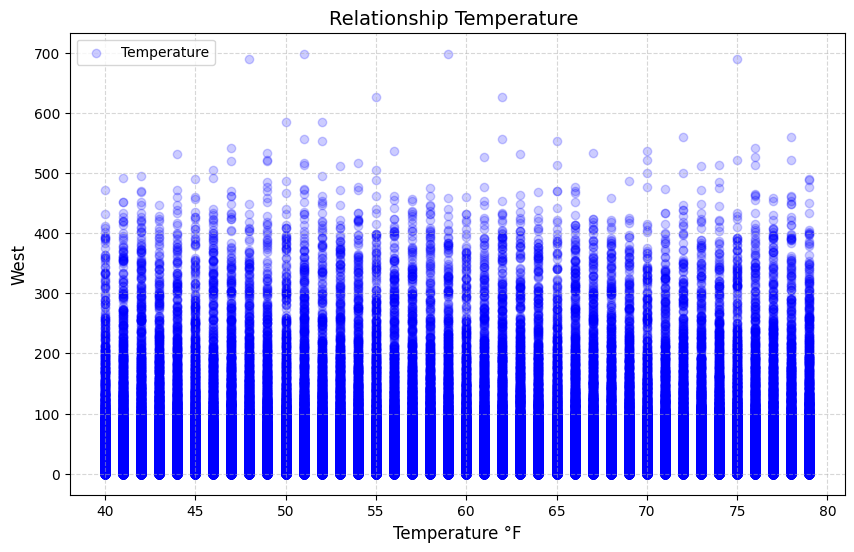

In [35]:
#3) 위 데이터를 시각화하여 분석 결과를 그래프로 표현하세요.
#Temperature와 west 통행량의 관계를 나타내는 산점도.

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['West'], alpha=0.2, c='blue', label='Temperature')
plt.title('Relationship Temperature ', fontsize=14)
plt.xlabel('Temperature °F', fontsize=12)
plt.ylabel('West', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

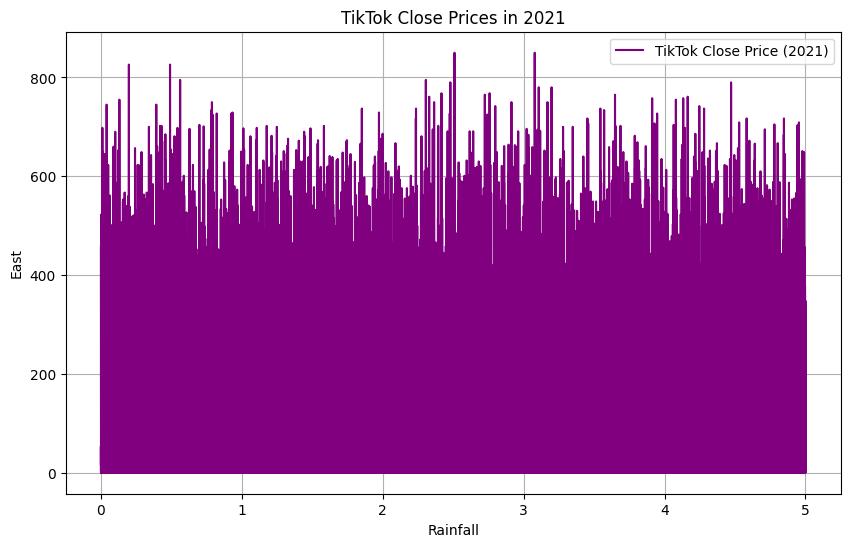

In [36]:
#Rainfall과 east 통행량의 관계를 나타내는 선 그래프.
sorted_data = data.sort_values(by='Rainfall')

plt.figure(figsize=(10, 6))
plt.plot(sorted_data['Rainfall'], sorted_data["East"], label="TikTok Close Price (2021)", color="purple")
plt.title("TikTok Close Prices in 2021")
plt.xlabel("Rainfall")
plt.ylabel("East")
plt.legend()
plt.grid()
plt.show()